In [1]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd
from scipy.optimize import minimize

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [8]:
four = pd.read_excel('4x4 data.xlsx')
four

,Unnamed: 0.1,Unnamed: 0,seed,size,optimizer,time (s),solution,solution probability,max_cut objective
0,0,0,201,16,COBYLA,0.952593,1011011111101010,2,-12
1,1,1,202,16,COBYLA,0.896351,1100110001110011,3,-8
2,2,2,203,16,COBYLA,0.929619,1110011100110,2,-10
3,3,3,204,16,COBYLA,0.905610,100101001010011,2,-18
4,4,4,205,16,COBYLA,0.991520,1010010110100101,7,-24
...,...,...,...,...,...,...,...,...,...
9795,9795,9795,9996,16,COBYLA,0.980176,1000000000111000,2,-9
9796,9796,9796,9997,16,COBYLA,0.886673,1010010110100101,7,-24
9797,9797,9797,9998,16,COBYLA,0.913339,1101011100101001,2,-14
9798,9798,9798,9999,16,COBYLA,0.840410,1100110000010010,3,-10


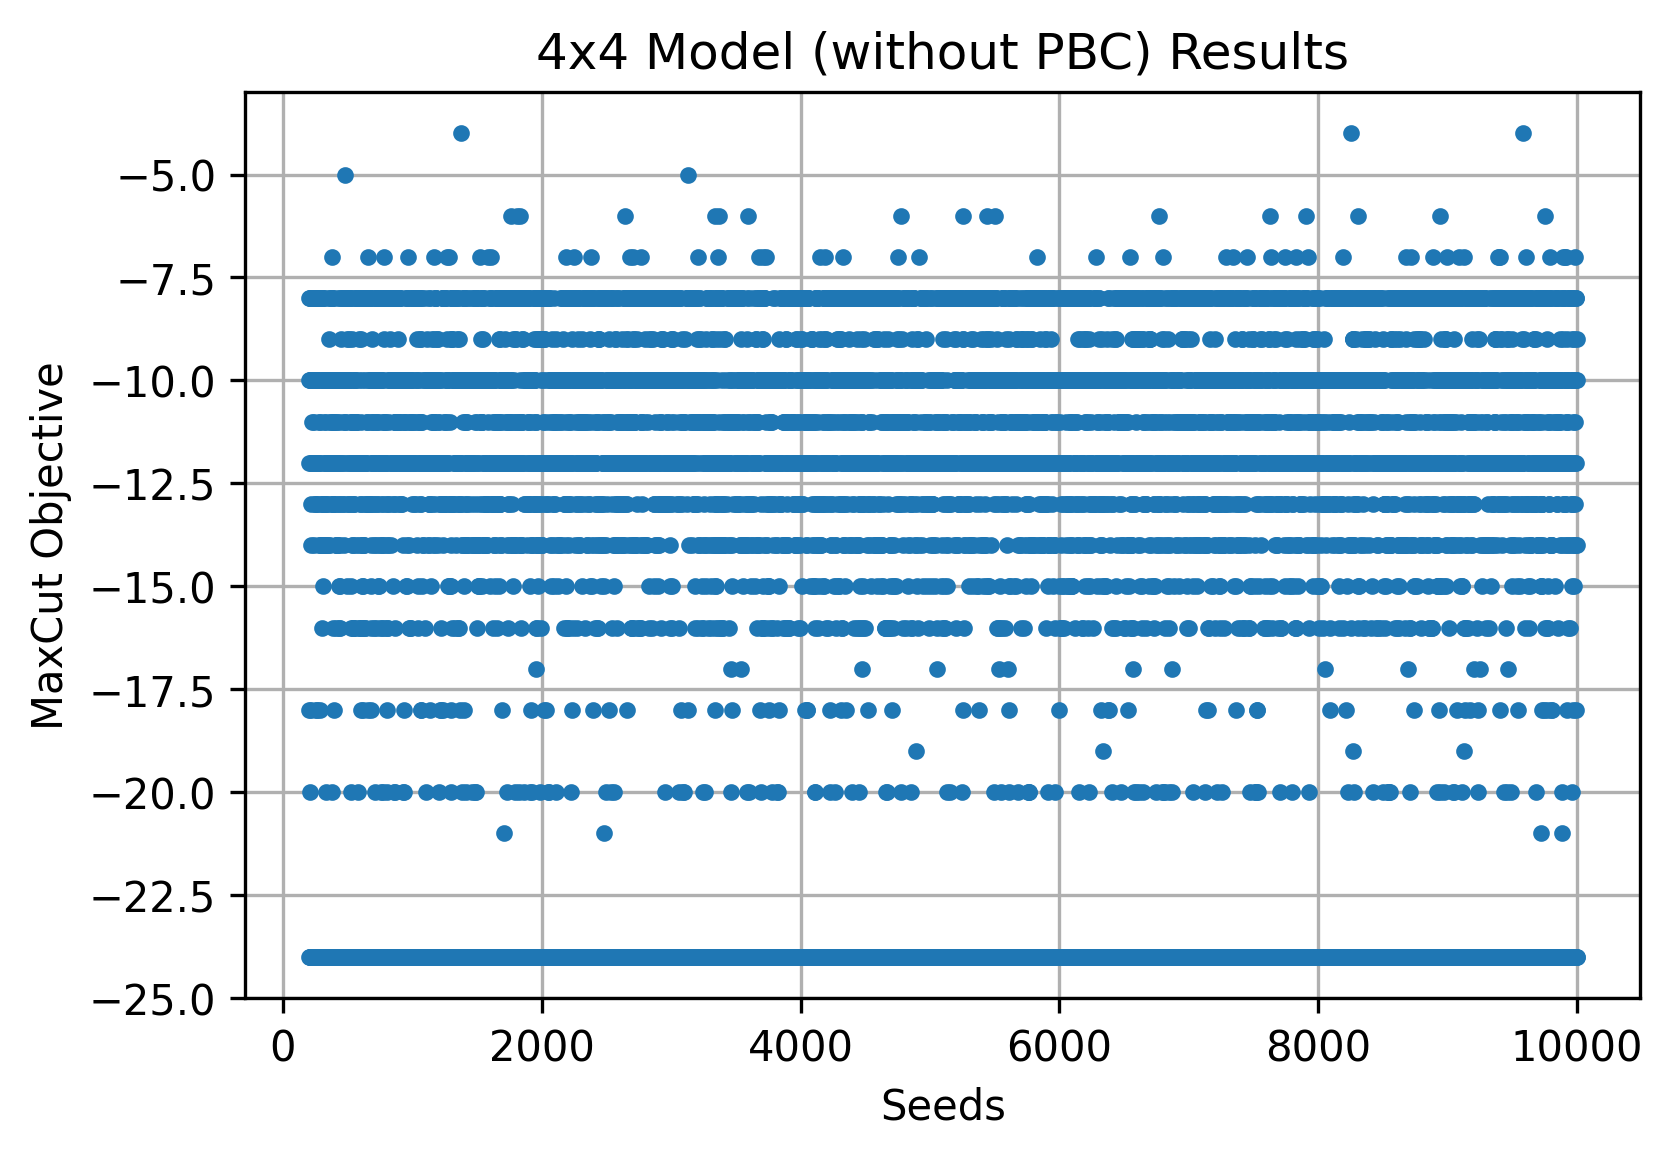

In [10]:
# 4x4 Model (without PBC) Results
seeds = np.linspace(201, 10000, 9800)
four_obj = four['max_cut objective']

plt.figure(dpi = 300)
plt.plot(seeds, four_obj, '.')
plt.xlabel('Seeds')
plt.ylabel('MaxCut Objective')
plt.title('4x4 Model (without PBC) Results')
plt.grid()
plt.show()

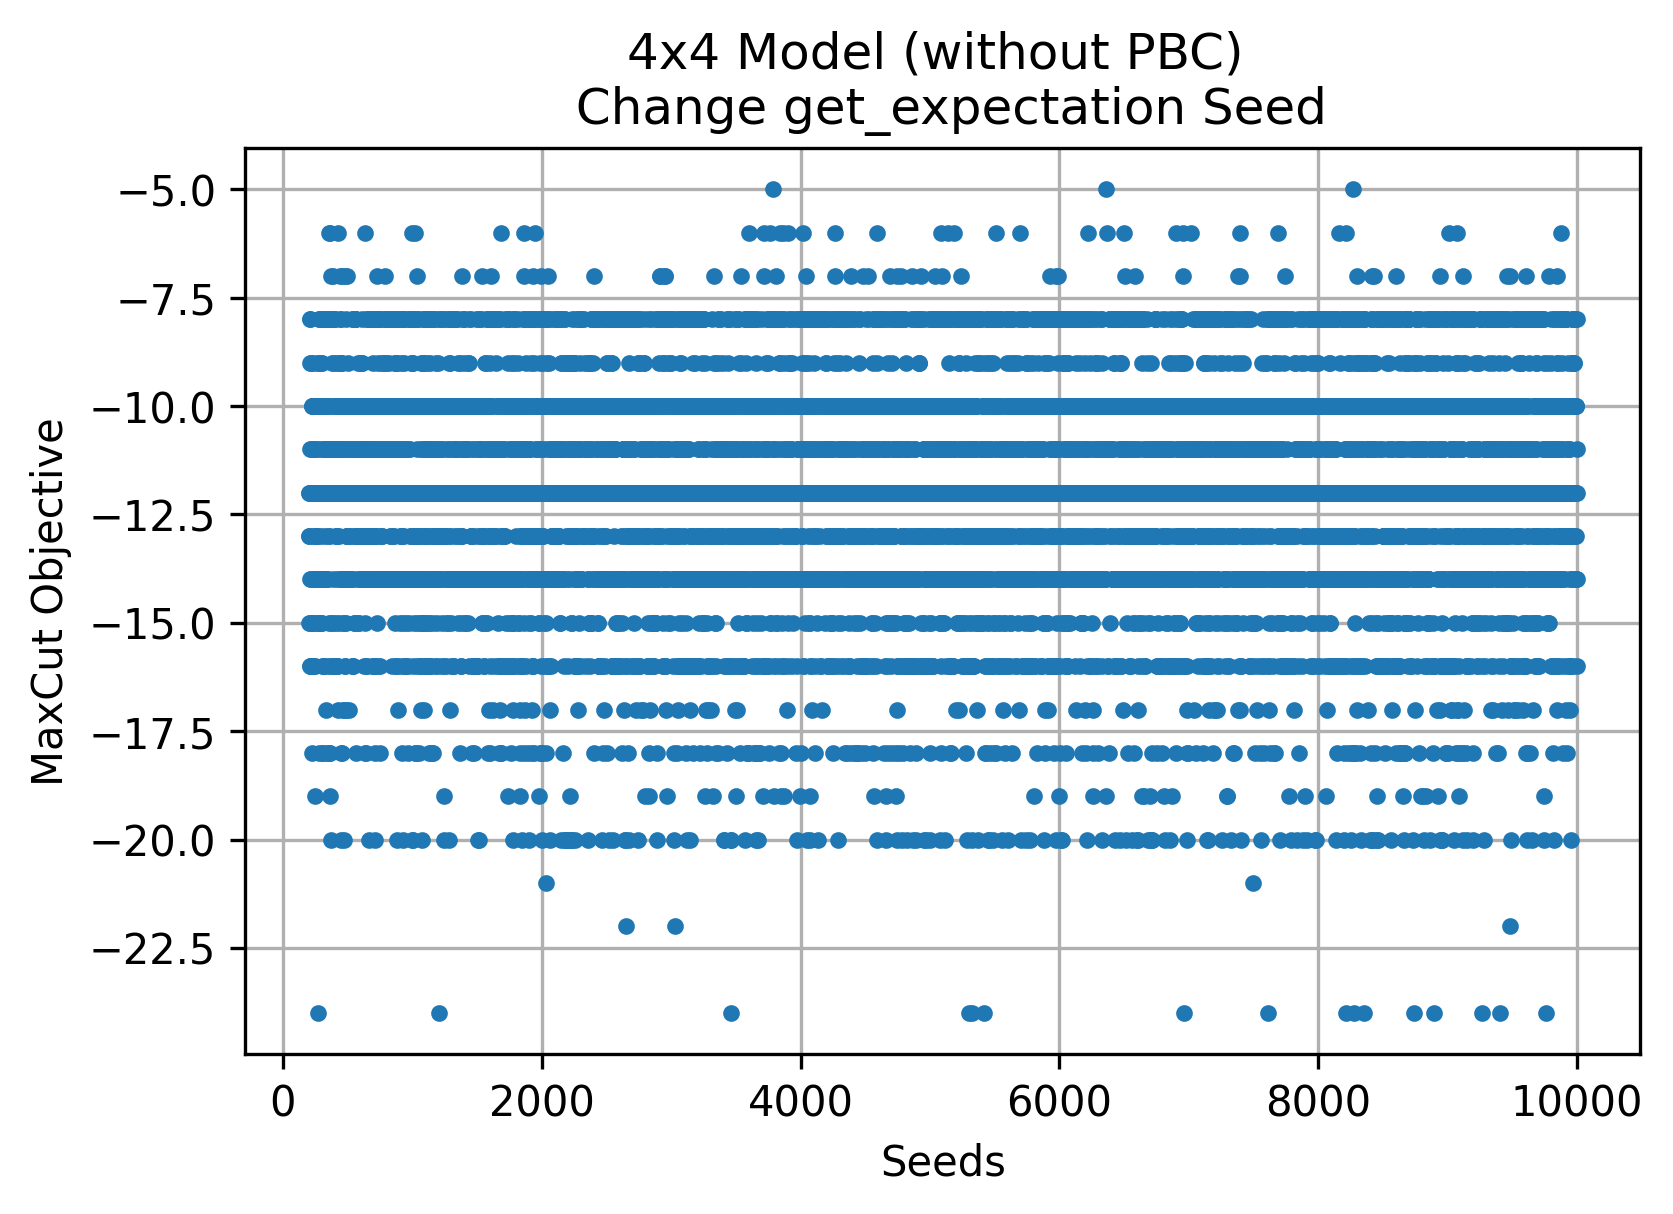

In [11]:
# changing get_exp seeds
four = pd.read_excel('4x4 data seed2.xlsx')
four_obj = four['max_cut objective']

plt.figure(dpi = 300)
plt.plot(seeds, four_obj, '.')
plt.xlabel('Seeds')
plt.ylabel('MaxCut Objective')
plt.title('4x4 Model (without PBC) \n Change get_expectation Seed')
plt.grid()
plt.show()

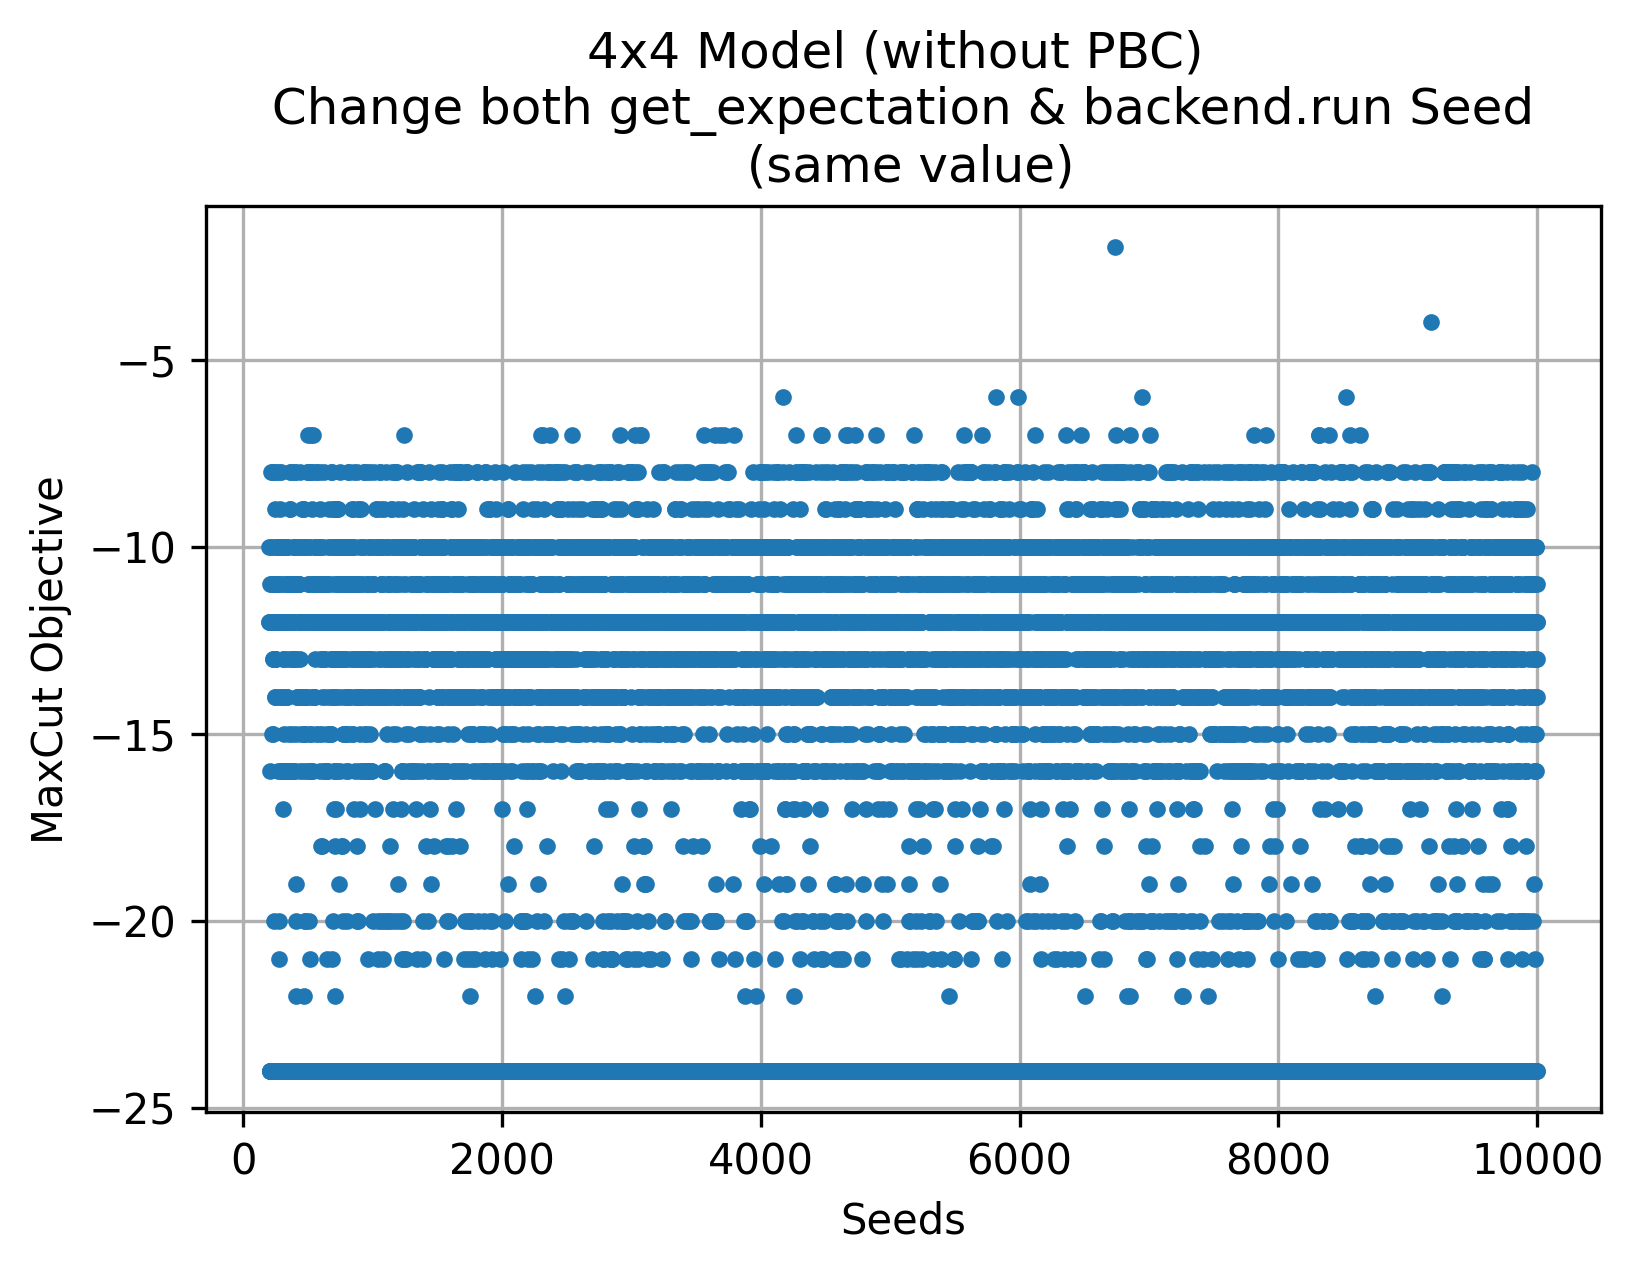

In [7]:
# changing get_exp seeds
four = pd.read_excel('4x4 data both seeds.xlsx')
four_obj = four['max_cut objective']

plt.figure(dpi = 300)
plt.plot(seeds, four_obj, '.')
plt.xlabel('Seeds')
plt.ylabel('MaxCut Objective')
plt.title('4x4 Model (without PBC) \n Change both get_expectation & backend.run Seed \n (same value)')
plt.grid()
plt.show()